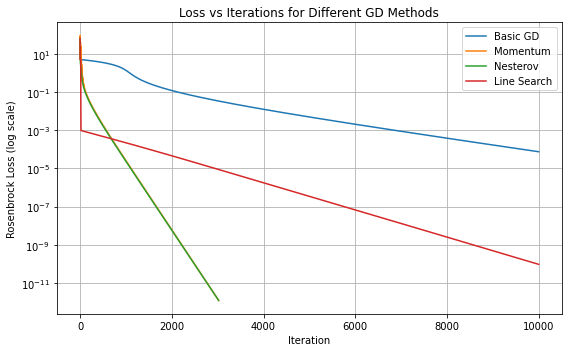

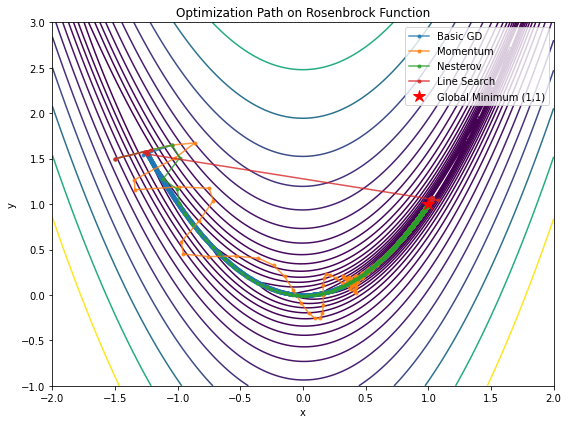

In [6]:
# 🧮 Gradient Descent on Rosenbrock's Function
# Author: Henrik Gundestrup
# Date: 2025
# Description:
# Implementation of Gradient Descent and its variants (Momentum, Nesterov, Line Search)
# applied to the Rosenbrock function to study convergence behavior.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# -------------------------------
# 1️⃣ Define the Rosenbrock Function
# -------------------------------

def rosenbrock(x, y, a=1, b=100):
    """Compute the Rosenbrock function value."""
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(x, y, a=1, b=100):
    """Compute the gradient of the Rosenbrock function."""
    df_dx = -2*(a - x) - 4*b*x*(y - x**2)
    df_dy = 2*b*(y - x**2)
    return np.array([df_dx, df_dy])

# -------------------------------
# 2️⃣ Basic Gradient Descent
# -------------------------------

def gradient_descent(lr=0.001, max_iter=10000, tol=1e-6):
    x = np.array([-1.5, 1.5])   # initial guess
    path = [x.copy()]
    losses = [rosenbrock(*x)]
    
    for i in range(max_iter):
        grad = rosenbrock_grad(*x)
        x -= lr * grad
        loss = rosenbrock(*x)
        
        path.append(x.copy())
        losses.append(loss)
        
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), np.array(losses)

# -------------------------------
# 3️⃣ Gradient Descent with Momentum
# -------------------------------

def gradient_descent_momentum(lr=0.001, beta=0.9, max_iter=10000, tol=1e-6):
    x = np.array([-1.5, 1.5])
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [rosenbrock(*x)]
    
    for i in range(max_iter):
        grad = rosenbrock_grad(*x)
        v = beta * v + lr * grad
        x -= v
        loss = rosenbrock(*x)
        
        path.append(x.copy())
        losses.append(loss)
        
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), np.array(losses)

# -------------------------------
# 4️⃣ Nesterov Accelerated Gradient
# -------------------------------

def nesterov_accelerated_gd(lr=0.001, beta=0.9, max_iter=10000, tol=1e-6):
    x = np.array([-1.5, 1.5])
    v = np.zeros_like(x)
    path = [x.copy()]
    losses = [rosenbrock(*x)]
    
    for i in range(max_iter):
        lookahead = x - beta * v
        grad = rosenbrock_grad(*lookahead)
        v = beta * v + lr * grad
        x -= v
        loss = rosenbrock(*x)
        
        path.append(x.copy())
        losses.append(loss)
        
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), np.array(losses)

# -------------------------------
# 5️⃣ Optional: Line Search (Adaptive Step Size)
# -------------------------------

def gradient_descent_line_search(alpha=0.3, beta=0.8, max_iter=10000, tol=1e-6):
    """Gradient Descent with backtracking line search."""
    x = np.array([-1.5, 1.5])
    path = [x.copy()]
    losses = [rosenbrock(*x)]
    
    for i in range(max_iter):
        grad = rosenbrock_grad(*x)
        t = 1.0
        fx = rosenbrock(*x)
        
        # Backtracking line search
        while rosenbrock(*(x - t * grad)) > fx - alpha * t * np.dot(grad, grad):
            t *= beta
        
        x -= t * grad
        loss = rosenbrock(*x)
        path.append(x.copy())
        losses.append(loss)
        
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), np.array(losses)

# -------------------------------
# 6️⃣ Run and Compare Methods
# -------------------------------

methods = {
    "Basic GD": gradient_descent(lr=0.001),
    "Momentum": gradient_descent_momentum(lr=0.001, beta=0.9),
    "Nesterov": nesterov_accelerated_gd(lr=0.001, beta=0.9),
    "Line Search": gradient_descent_line_search()
}

# -------------------------------
# 7️⃣ Plot: Loss vs Iterations
# -------------------------------

plt.figure(figsize=(8,5))
for name, (path, losses) in methods.items():
    plt.semilogy(losses, label=name)
plt.xlabel("Iteration")
plt.ylabel("Rosenbrock Loss (log scale)")
plt.title("Loss vs Iterations for Different GD Methods")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/loss_curve.png", dpi=300)
plt.show()

# -------------------------------
# 8️⃣ Plot: Optimization Path on Contour
# -------------------------------

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap=cm.viridis)

for name, (path, _) in methods.items():
    plt.plot(path[:,0], path[:,1], marker='.', label=name, alpha=0.8)

plt.plot(1, 1, 'r*', markersize=12, label='Global Minimum (1,1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Path on Rosenbrock Function')
plt.legend()
plt.tight_layout()
plt.savefig("images/optimization_path.png", dpi=300)
plt.show()
